# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

## 1. Importa los datos 'df_furniture.csv'

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [5]:
# valores nulos

,Month,furniture_price_adjusted
15,NaT,2457.704334
21,NaT,2715.938414
39,NaT,2857.008678
40,NaT,3086.648631
60,NaT,3298.628987


In [6]:
# tamaño de la muestra

331

In [7]:
# fecha mínima de la muestra

Timestamp('1992-01-01 00:00:00')

In [8]:
# fecha máxima de la muestra

Timestamp('2019-07-01 00:00:00')

In [9]:
# dado que la frecuencia es mensual, rellena los valores nulos

# puedes usar un date_range

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [11]:
# revisa si quedan nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 2. Trata la fecha como texto y parsea. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas


In [ ]:
# Superconsejito: Haz un copy del df original para no pisarlo

# Esta parte del ejercicio es para repasar cómo parsear en caso de que recibas una fecha que no sea datetime, aunque no sea el caso

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
 2   date_str                  331 non-null    object        
 3   year                      331 non-null    int32         
 4   month                     331 non-null    int32         
 5   day                       331 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(1)
memory usage: 11.8+ KB


,Month,furniture_price_adjusted,date_str,year,month,day,new_date
0,1992-01-01,2073.432724,1992-01-01,1992,1,1,1992-01-01
1,1992-02-01,2114.485812,1992-02-01,1992,2,1,1992-02-01
2,1992-03-01,2260.570891,1992-03-01,1992,3,1,1992-03-01
3,1992-04-01,2255.103236,1992-04-01,1992,4,1,1992-04-01
4,1992-05-01,2331.414618,1992-05-01,1992,5,1,1992-05-01
...,...,...,...,...,...,...,...
326,2019-03-01,9718.107698,2019-03-01,2019,3,1,2019-03-01
327,2019-04-01,9248.814254,2019-04-01,2019,4,1,2019-04-01
328,2019-05-01,10001.305304,2019-05-01,2019,5,1,2019-05-01
329,2019-06-01,9431.337229,2019-06-01,2019,6,1,2019-06-01


## 3. ¿De qué fecha a qué fecha va el histórico?

In [17]:
df

,Date,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [18]:
# min de la serie
# max de la serie

1992-01-01 00:00:00
2019-07-01 00:00:00


La serie va desde enero de 1992 a julio de 2019

In [19]:
# cálcula el tamaño de la serie en años

27.496235455167692

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

In [ ]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


<AxesSubplot:xlabel='Date'>

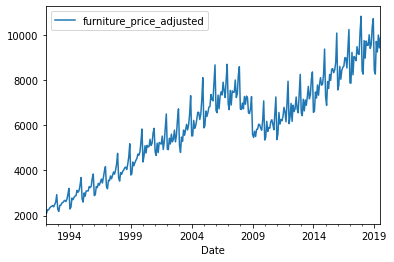

Se ve que tiene una tendencia al alza, a pesar de descenso en las acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [22]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# adfuller

0.7035529748089981

In [24]:
# describe toda la serie

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


In [27]:
# describe la primera mitad de la serie

,furniture_price_adjusted
count,165.000000
mean,4366.695881
std,1412.738867
min,2073.432724
25%,3115.400080
50%,4275.168742
75%,5428.334524
max,8110.153770


In [28]:
# describe la segunda mitad de la serie

,furniture_price_adjusted
count,166.000000
mean,7575.142501
std,1270.370560
min,5349.481724
25%,6613.056182
50%,7345.578004
75%,8439.580036
max,10833.501852


## 6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?


In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

array([[0.00000000e+00, 2.20677961e+03],
       [1.00000000e+00, 2.23030504e+03],
       [2.00000000e+00, 2.25363575e+03],
       [3.00000000e+00, 2.27680618e+03],
       [4.00000000e+00, 2.29985791e+03],
       [5.00000000e+00, 2.32283809e+03],
       [6.00000000e+00, 2.34579369e+03],
       [7.00000000e+00, 2.36876567e+03],
       [8.00000000e+00, 2.39178496e+03],
       [9.00000000e+00, 2.41487011e+03],
       [1.00000000e+01, 2.43802959e+03],
       [1.10000000e+01, 2.46124823e+03],
       [1.20000000e+01, 2.48445239e+03],
       [1.30000000e+01, 2.50744743e+03],
       [1.40000000e+01, 2.52989409e+03],
       [1.50000000e+01, 2.55115574e+03],
       [1.60000000e+01, 2.57010550e+03],
       [1.70000000e+01, 2.58724032e+03],
       [1.80000000e+01, 2.60500821e+03],
       [1.90000000e+01, 2.62421845e+03],
       [2.00000000e+01, 2.64571834e+03],
       [2.10000000e+01, 2.67009595e+03],
       [2.20000000e+01, 2.69702042e+03],
       [2.30000000e+01, 2.72551366e+03],
       [2.400000

<AxesSubplot:xlabel='Date'>

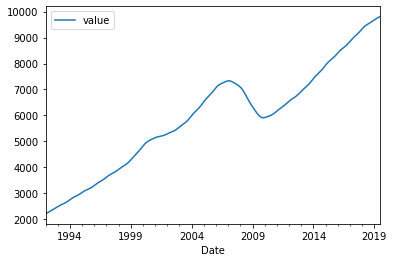

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

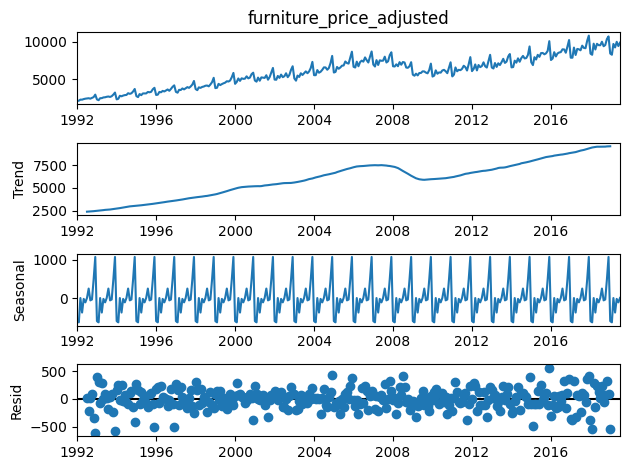

In [48]:
# model = "additive"

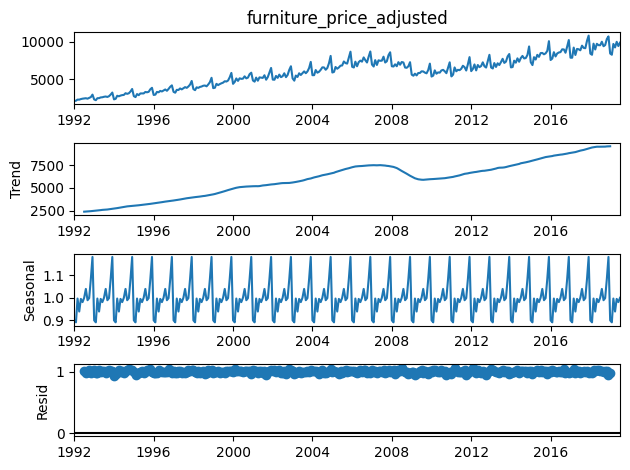

In [49]:
# model = "multiplicative"

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

In [ ]:
from pandas.plotting import autocorrelation_plot

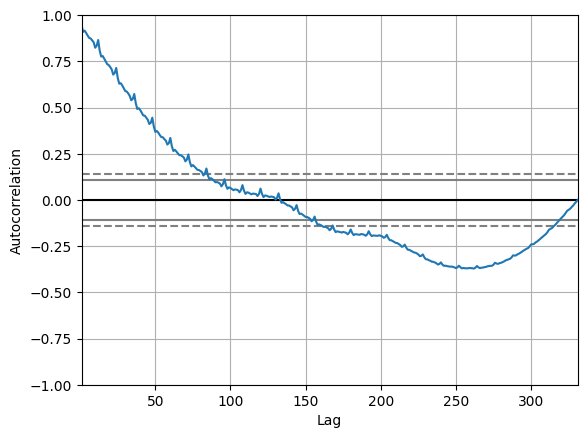

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [ ]:
# Superconsejito: Haz un copy del df original para no pisarlo

In [54]:
# df_2.head(20)

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236


In [55]:
# Matriz de correlación

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
furniture_price_adjusted,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


<AxesSubplot:>

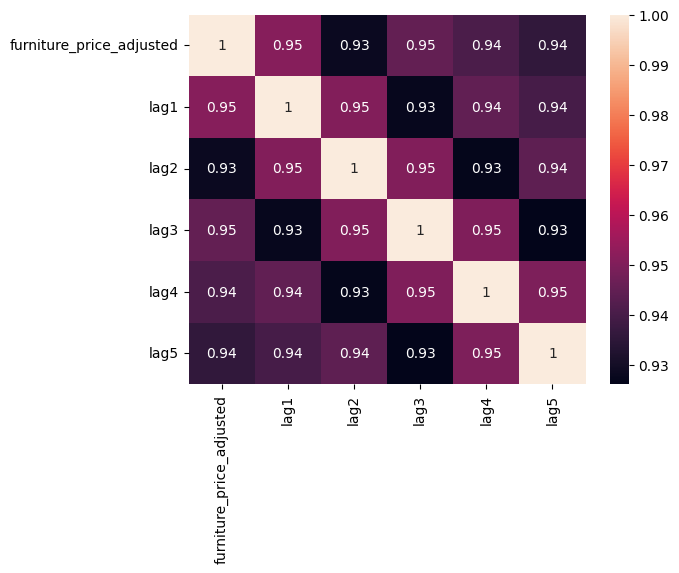

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

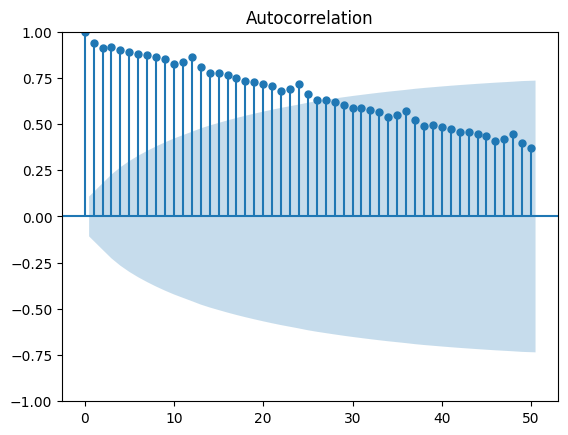

In [60]:
# lags=50

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [64]:
df

,furniture_price_adjusted
Date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


<AxesSubplot:xlabel='Date'>

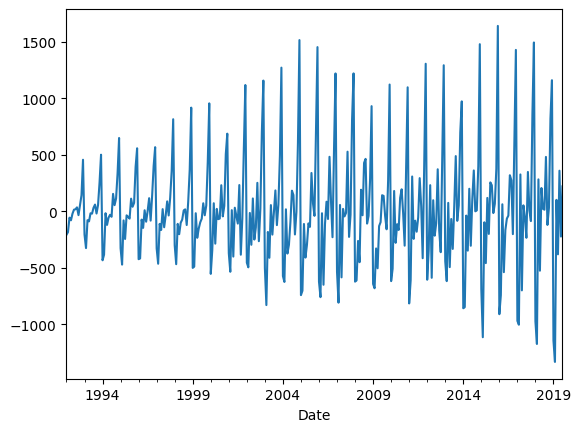

<AxesSubplot:xlabel='Date'>

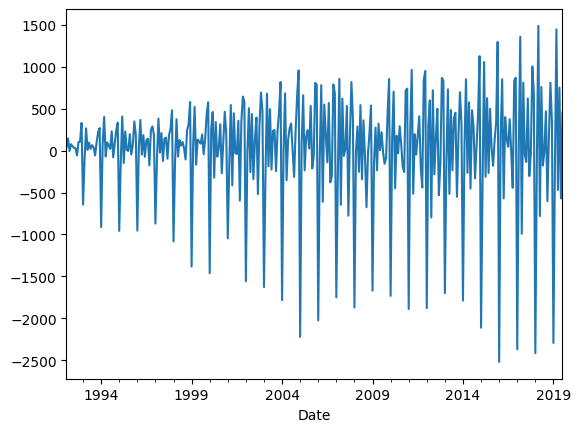

In [69]:
# diff = df['furniture_price_adjusted'].diff(1).dropna()
# diff.plot()